In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [85]:
''' read csv '''
df = pd.read_excel('dataset.xlsx')
print("\033[1mData shape befor filtering:  \033[0m ", df.shape)
print("\033[1mColumns Before renaming: \033[0m")
for c in df.columns:
    print("\t", c)

np.random.seed(2021252) 
    
''' cleaning: rename '''
df.rename(columns={'Meaning of 2012 NAICS code':'Brand', 'Sales ($1,000)':'Sales'}, inplace=True)

''' filter dataframe '''
df = df[df.Brand=='Retail trade']

''' + columns '''
df['Date'] = np.random.randint(2012,2022,size=(df.shape[0])).tolist()
print("\033[1mData shape after filtering: \033[0m" , df.shape)
for c in df.columns:
    print("\t", c)
''' Drop Columns with only one fix value or repeated columns'''
df = df.drop(['2012 NAICS code', 'Brand', 'Year', 
              'Response coverage of product lines inquiry (%)', 
              'Meaning of Products and services code',
              'Percent of sales accounted for by industry (%)'], axis=1)

''' Replace NAN for empty cells '''
df = df.replace({'X':np.nan, 'Z':np.nan})


''' Replace NAN with mean '''
df = df.fillna(df.mean())




Data shape befor filtering:    (11797, 12)
Columns Before renaming: 
	 2012 NAICS code
	 Meaning of 2012 NAICS code
	 Products and services code
	 Meaning of Products and services code
	 Year
	 Number of establishments
	 Total sales of estabs reporting product line ($1,000)
	 Sales ($1,000)
	 Product line sales as % of total sales of estabs reporting line (%)
	 Product line sales as % of total sales of all estabs (%)
	 Response coverage of product lines inquiry (%)
	 Percent of sales accounted for by industry (%)
Data shape after filtering:  (51, 13)
	 2012 NAICS code
	 Brand
	 Products and services code
	 Meaning of Products and services code
	 Year
	 Number of establishments
	 Total sales of estabs reporting product line ($1,000)
	 Sales
	 Product line sales as % of total sales of estabs reporting line (%)
	 Product line sales as % of total sales of all estabs (%)
	 Response coverage of product lines inquiry (%)
	 Percent of sales accounted for by industry (%)
	 Date


In [86]:
df

Products and services code  Number of establishments  \
0                        20000                   1062083   
1                        20100                    361300   
2                        20130                      2515   
3                        20140                    200112   
4                        20150                    229623   
5                        20160                    270472   
6                        20180                    176345   
7                        20190                    176243   
8                        20200                    147960   
9                        20220                    193713   
10                       20240                    106941   
11                       20250                     34619   
12                       20260                    161210   
13                       20270                     28056   
14                       20280                     67150   
15                       20300                     44954   
16                       20310                     86686   
17                       20320                     66825   
18                       20330                     79578   
19                       20340                     92225   
20                       20360                     50812   
21                       20370                     53500   
22                       20380                    168897   
23                       20400                    134880   
24                       20420                     81065   
25                       20440                     44545   
26                       20460                    131837   
27                       20490                     57339   
28                       20530                     74480   
29                       20580                      4238   
30                       20590                     17840   
31                       20600                    125658   
32                       20620                    123206   
33                       20640                     46335   
34                       20670                     38715   
35                       20680                      2282   
36                       20690                     10352   
37                       20700                     52346   
38                       20720                    126870   
39                       20730                    116149   
40                       20740                    151863   
41                       20780                     46879   
42                       20790                        97   
43                       20800                    147092   
44                       20810                     31162   
45                       20830                     26732   
46                       20850                    337673   
47                       21100                    131609   
48                       21220                     12424   
49                       29810                    168335   
50                       29900                    274420   

    Total sales of estabs reporting product line ($1,000)       Sales  \
0                                        9.156652e+08      4219821871   
1                                        2.179475e+09       645921455   
2                                        5.037027e+06          287335   
3                                        1.437362e+09        85429937   
4                                        1.495954e+09        69208152   
5                                        1.883322e+09       464684628   
6                                        1.420570e+09        34829055   
7                                        1.374570e+09        32525440   
8                                        1.094166e+09        75516147   
9                                        1.182772e+09       157720129   
10                                       8.919826e+08        37091820   
11     

In [87]:
df.corr().style.background_gradient(cmap='coolwarm')


In [88]:
''' Drop High Correlated column (More than 0.95)'''

df = df.drop(['Product line sales as % of total sales of all estabs (%)'], axis=1)
df.corr().style.background_gradient(cmap='coolwarm')


<AxesSubplot:title={'center':'Sales by Date'}, xlabel='Date', ylabel='Sales'>

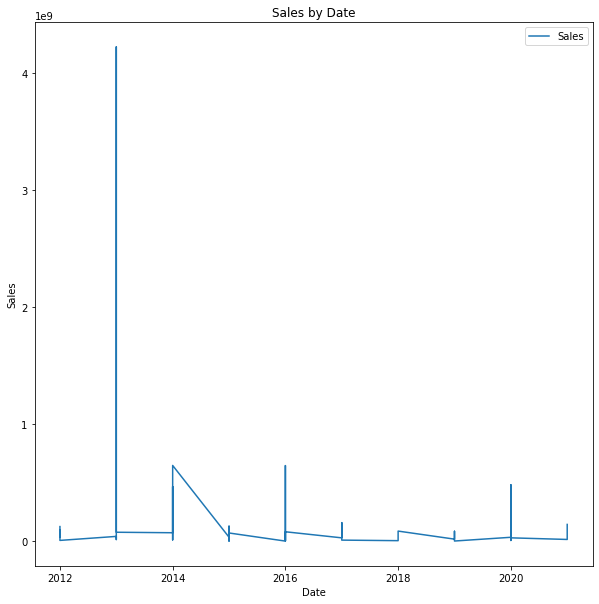

In [89]:
# Sort data by `Date`

df1 = df.sort_values(by = 'Date')
df1.plot(x='Date', y='Sales', figsize=(10,10), xlabel='Date', ylabel='Sales', title='Sales by Date')

<AxesSubplot:title={'center':'Sales by Date'}, xlabel='Date', ylabel='Sales'>

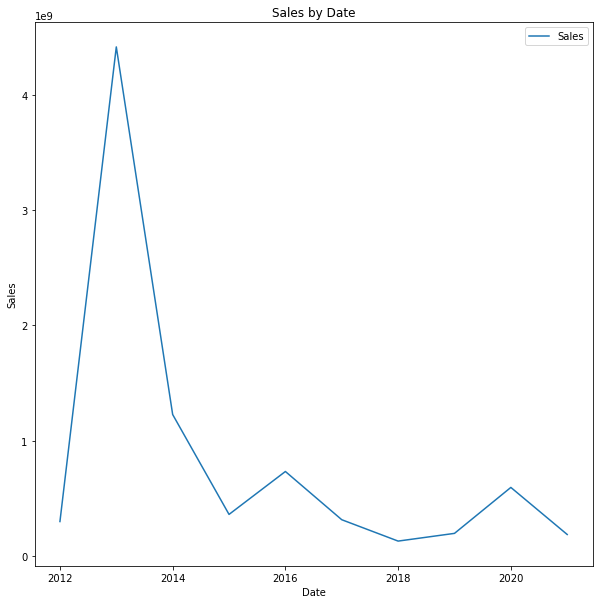

In [90]:
# Groupby rows based on column `Date`, then aggregate funtioncs on required columns

agg_d = {'Number of establishments':'mean', 
         'Total sales of estabs reporting product line ($1,000)':'sum',
         'Product line sales as % of total sales of estabs reporting line (%)':'mean',
         'Sales': 'sum'}
df2 = df1.groupby(['Date'], as_index=False).agg(agg_d)


# Rename Columns to shortnames...
mapper = {'Number of establishments': 'ne', 'Total sales of estabs reporting product line ($1,000)':'tsoerpl',
          'Product line sales as % of total sales of estabs reporting line (%)': 'plsaotsoerl'}
df2 = df2.rename(mapper=mapper, axis=1)
df2.plot(x='Date', y='Sales', figsize=(10,10), xlabel='Date', ylabel='Sales', title='Sales by Date')


In [91]:
df2


Date             ne       tsoerpl  plsaotsoerl       Sales
0  2012   92503.000000  4.166636e+09    11.820000   296098494
1  2013  277431.333333  5.682135e+09    14.696000  4420848311
2  2014  150932.166667  6.750994e+09    14.500000  1226150053
3  2015  109909.714286  6.633876e+09     5.200000   358081435
4  2016   44538.400000  2.828419e+09    18.740000   731066613
5  2017  106061.600000  4.805126e+09     6.560000   311872728
6  2018   82449.333333  2.106550e+09    34.400000   126190228
7  2019  112463.400000  4.805268e+09     3.380000   193247742
8  2020   94614.833333  5.713447e+09    11.566667   592601453
9  2021  148608.000000  3.206475e+09     4.633333   183486685

In [92]:
'''
# Reframe dataset to predict next year `Sales` price from current year data
# I could use a window greater than one but I didn't...
# Because I got somehow a good score and there is not much data (we have only 10 instances)...
# I could use upsampling but I think its not what you want..
'''


df10 = df2.copy()
df10 = df10.append(df2.iloc[0]).sort_values(by = 'Date')
df10['dd'] =df10.Date.shift(-1)
df10.dd.iloc[-1]  = 2022
df10['ss'] = df10.Sales.shift(-1)
df10 = df10.drop(['Sales'], axis=1)
df10


Date             ne       tsoerpl  plsaotsoerl      dd            ss
0  2012.0   92503.000000  4.166636e+09    11.820000  2012.0  2.960985e+08
0  2012.0   92503.000000  4.166636e+09    11.820000  2013.0  4.420848e+09
1  2013.0  277431.333333  5.682135e+09    14.696000  2014.0  1.226150e+09
2  2014.0  150932.166667  6.750994e+09    14.500000  2015.0  3.580814e+08
3  2015.0  109909.714286  6.633876e+09     5.200000  2016.0  7.310666e+08
4  2016.0   44538.400000  2.828419e+09    18.740000  2017.0  3.118727e+08
5  2017.0  106061.600000  4.805126e+09     6.560000  2018.0  1.261902e+08
6  2018.0   82449.333333  2.106550e+09    34.400000  2019.0  1.932477e+08
7  2019.0  112463.400000  4.805268e+09     3.380000  2020.0  5.926015e+08
8  2020.0   94614.833333  5.713447e+09    11.566667  2021.0  1.834867e+08
9  2021.0  148608.000000  3.206475e+09     4.633333  2022.0           NaN

In [93]:


# df4 = df2.copy()
# # df4['dd'] =df4.Date.shift(-1)
# df4['ss'] = df2.Sales.shift(-1)
# df4 = df4.drop(['Sales'], axis=1)
# # df4.dd.iloc[-1]  = 2022
# df4

In [94]:
# split_date = 2017
# df3 = df4.copy()
# pt = preprocessing.StandardScaler()
# mmscaler = preprocessing.MinMaxScaler()#(feature_range=(1,1000))
# df3[['ne','tsoerpl','plsaotsoerl']] = pt.fit_transform(df3[['ne','tsoerpl','plsaotsoerl']])
# df3[['ss']] = mmscaler.fit_transform(df3[['ss']])

# df_train = df3.loc[df3.Date <= split_date].copy()
# df_test = df3.loc[df3.Date  > split_date].copy()
# df_test

In [95]:
# split_date = 2017
# df3 = df4.copy()
# pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
# mmscaler = preprocessing.MinMaxScaler()#(feature_range=(1,1000))
# df3[['ne','tsoerpl','plsaotsoerl']] = pt.fit_transform(df3[['ne','tsoerpl','plsaotsoerl']])
# df3[['ss']] = mmscaler.fit_transform(df3[['ss']])

# df_train = df3.loc[df3.Date <= split_date].copy()
# df_test = df3.loc[df3.Date  > split_date].copy()
# # df_test.drop(['Date'], axis=1, inplace=True)
# # df_train.drop(['Date'], axis=1, inplace=True)
# df_test

In [96]:
split_date = 2017
df3 = df10.copy()
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
mmscaler = preprocessing.MinMaxScaler()#(feature_range=(1,1000))
df_train = df3.loc[df3.Date <= split_date].copy()
df_test = df3.loc[df3.Date  > split_date].copy()
df_train[['ne','tsoerpl','plsaotsoerl']] = pt.fit_transform(df_train[['ne','tsoerpl','plsaotsoerl']])
df_train[['ss']] = mmscaler.fit_transform(df_train[['ss']])

df_test[['ne','tsoerpl','plsaotsoerl']] = pt.transform(df_test[['ne','tsoerpl','plsaotsoerl']])
df_test[['ss']] = mmscaler.transform(df_test[['ss']])

print("Training data is from 2012 to {0}".format(split_date))
print("Test data is from {0} to 2021".format(split_date))
df_test

Training data is from 2012 to 2017
Test data is from 2017 to 2021


Date        ne       tsoerpl  plsaotsoerl      dd        ss
6  2018.0  7.501759  1.089575e+09    32.049715  2019.0  0.015614
7  2019.0  7.627936  2.420239e+09     2.353036  2020.0  0.108603
8  2020.0  7.558077  2.861643e+09    10.293208  2021.0  0.013341
9  2021.0  7.738616  1.636183e+09     3.579541  2022.0       NaN

In [97]:
X_train, y_train = df_train[['dd', 'ne','tsoerpl','plsaotsoerl']].values , df_train[['ss']].values
X_test, y_test = df_test[['dd', 'ne','tsoerpl','plsaotsoerl']].values , df_test[['ss']].values
X_test

array([[2.01900000e+03, 7.50175912e+00, 1.08957545e+09, 3.20497150e+01],
       [2.02000000e+03, 7.62793578e+00, 2.42023923e+09, 2.35303563e+00],
       [2.02100000e+03, 7.55807692e+00, 2.86164314e+09, 1.02932082e+01],
       [2.02200000e+03, 7.73861570e+00, 1.63618319e+09, 3.57954092e+00]])

In [98]:
import warnings
warnings.filterwarnings("ignore")

params = {
    "n_estimators": 100,
    "max_depth": 1,
    "min_samples_split": 3,
    "learning_rate": 0.9,
    "loss": "ls",
     "random_state": 0
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train.ravel())
rmse = mean_squared_error(y_test.ravel()[:-1], reg.predict(X_test)[:-1], squared=False)
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

The root mean squared error (RMSE) on test set: 0.0131


In [99]:
rmse = mean_squared_error(y_train.ravel(), reg.predict(X_train), squared=False)
print("The root mean squared error (RMSE) on train set: {:.4f}".format(rmse))

The root mean squared error (RMSE) on train set: 0.0000


<Figure size 432x288 with 0 Axes>

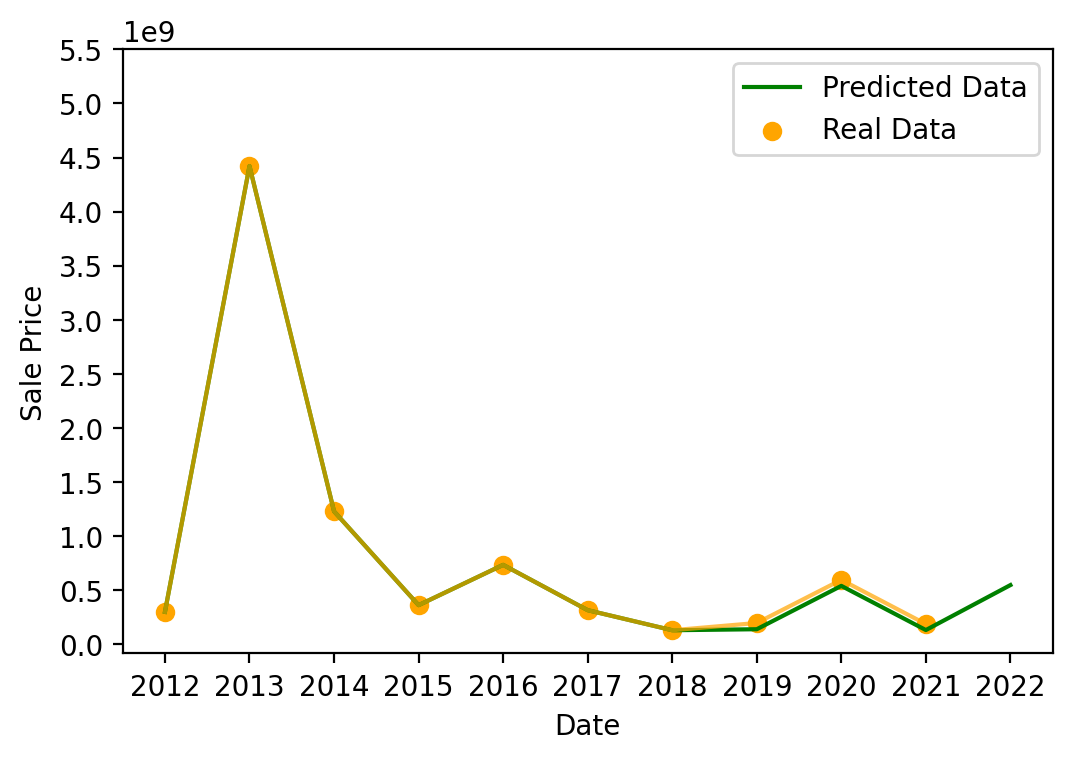

In [100]:
y = reg.predict(np.concatenate([X_train, X_test]))
y = mmscaler.inverse_transform(y.reshape(-1, 1))
y1 = df10[['ss']] #mmscaler.inverse_transform(df3[['ss']])

plt.clf()
fig, ax = plt.subplots()
fig.dpi = 200

ax.plot(df10.dd, y.ravel(), color="green", label="Predicted Data")
ax.plot(df10.dd, y1, alpha=0.7, color="orange")
ax.scatter(df10.dd, y1, color="orange", label="Real Data")

ax.set_yticks(np.arange(0, 6e9, 5e8))
ax.set_xticks(np.arange(2012, 2023, 1))
ax.set_ylabel("Sale Price")
ax.set_xlabel("Date")
ax.legend(loc="upper right")
plt.savefig("./Prediction.png")
plt.show()
plt.close(fig)

<Figure size 432x288 with 0 Axes>

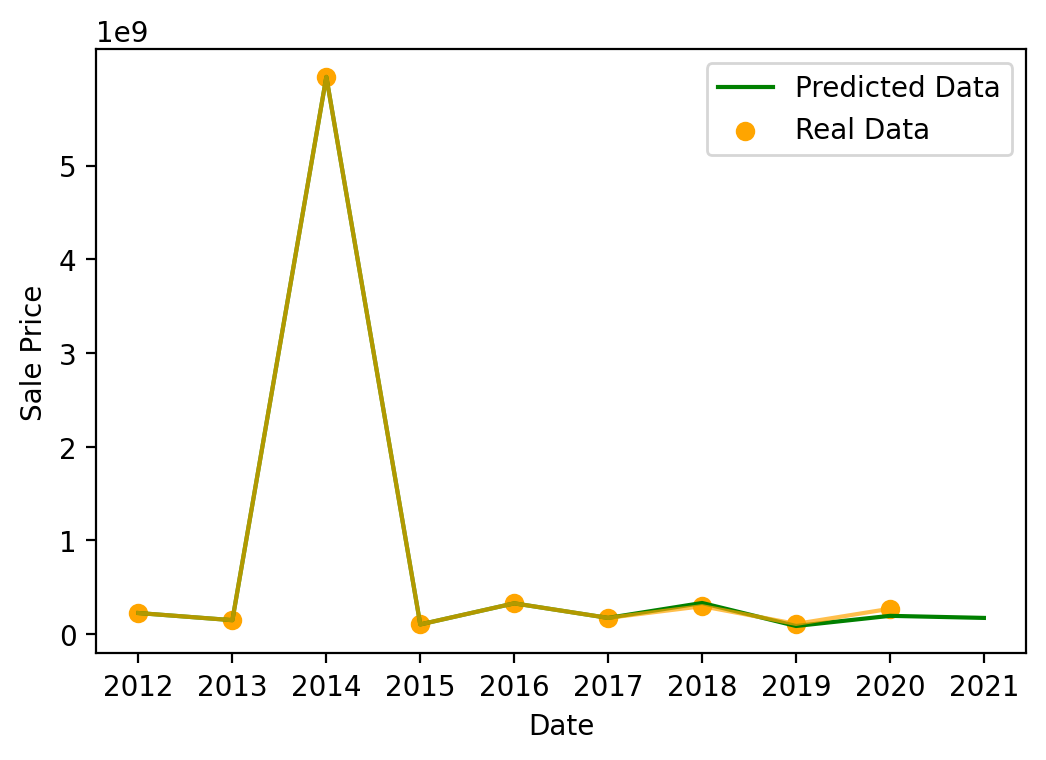

In [563]:
y = reg.predict(np.concatenate([X_train, X_test]))
y = mmscaler.inverse_transform(y.reshape(-1, 1))
y1 = df3[['ss']] #mmscaler.inverse_transform(df3[['ss']])

plt.clf()
fig, ax = plt.subplots()
fig.dpi = 200

ax.plot(df4.Date, y.ravel(), color="green", label="Predicted Data")
ax.plot(df4.Date, y1, alpha=0.7, color="orange")
ax.scatter(df4.Date, y1, color="orange", label="Real Data")

ax.set_yticks(np.arange(0, 6e9, 1e9))
ax.set_xticks(np.arange(2012, 2022, 1))
ax.set_ylabel("Sale Price")
ax.set_xlabel("Date")
ax.legend(loc="upper right")
plt.show()
plt.close(fig)

In [ ]:
# y = reg.predict(np.concatenate([X_train, X_test]))
# y = mmscaler.inverse_transform(y.reshape(-1, 1))
# y1 = mmscaler.inverse_transform(df3[['ss']])

# plt.clf()
# fig, ax = plt.subplots()
# fig.dpi = 200

# ax.plot(df4.Date, y.ravel(), color="green", label="Predicted Data")
# ax.plot(df4.Date, y1.ravel(), alpha=0.7, color="orange")
# ax.scatter(df4.Date, y1.ravel(), color="orange", label="Real Data")

# ax.set_yticks(np.arange(0, 6e9, 1e9))
# ax.set_xticks(np.arange(2012, 2022, 1))
# ax.set_ylabel("Sale Price")
# ax.set_xlabel("Date")
# ax.legend(loc="upper right")
# plt.show()
# plt.close(fig)